# L1-L2 Regularization

Poor performance in machine learning models comes from either overfitting or underfitting, and we’ll take a close look at the first one. Overfitting happens when the learned hypothesis is fitting the training data so well that it hurts the model’s performance on unseen data. The model generalizes poorly to new instances that aren’t a part of the training data. 

Complex models, like the Random Forest, Neural Networks, and XGBoost are more prone to overfitting. Simpler models, like linear regression, can overfit too – this typically happens when there are more features than the number of instances in the training data. 

So, the best way to think of overfitting is by imagining a data problem with a simple solution, but we decide to fit a very complex model to our data, providing the model with enough freedom to trace the training data and random noise. 

### How do we detect Overfitting

To detect overfitting in our ML model, we need a way to test it on unseen data. We often leverage a technique called “Cross Validation” whenever we want to evaluate the performance of a model on unseen instances. Cross validation is a variety of model validation techniques that assess the quality of a predictive model’s generalization capabilities to an independent set of data that the model hasn’t seen. 

The most basic type of cross validation implementation is the hold-out based cross validation. This implementation splits the available data into training and testing sets. To evaluate our model using hold-out based cross validation, we would first build and train a model on the training split of our hold-out set, and then use the model to make predictions using the test set, so we can evaluate how it performs. 

We know what overfitting is, and how we can detect overfitting in our models using the hold-out based cross validation technique. Let’s get some data, and implement these techniques on our data to detect if our model is overfitting. 

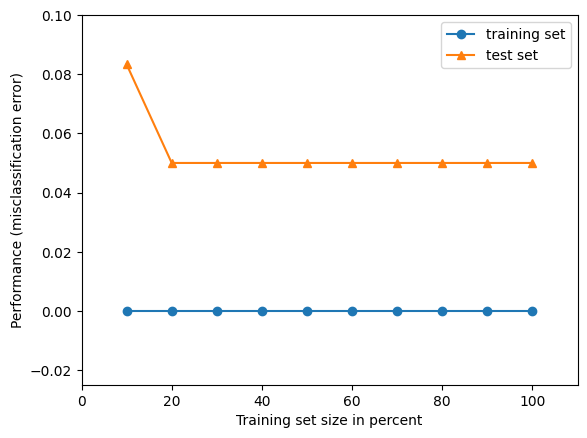

In [1]:
# importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from mlxtend.plotting import plot_learning_curves
from sklearn.model_selection import train_test_split

# loading the data set
dataset = load_iris()
df = pd.DataFrame(data= dataset.data)

# adding the target label to dataframe
df["target"] = dataset.target

# separating features and target label
X = df.iloc[:, :-1]
y = df["target"].values

# splitting training and test (hold out based cross validation)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.60,
                                                    shuffle=True,
                                                    random_state=24)

# instantiating the model 
clf = RandomForestClassifier(random_state=24)

# plotting the learning curve
plot_learning_curves(X_train=X_train,
                     y_train=y_train,
                     X_test=X_test,
                     y_test=y_test,
                     clf=clf,
                     scoring="misclassification error",
                     print_model=False)
plt.ylim(top=0.1, bottom=-0.025)
plt.show()

In the image above, we can clearly see that our Random Forest model is overfitting to the training data. Our Random Forest model has a perfect misclassification error on the training set, but a 0.05 misclassification error on the test set. It’s illustrated by the gap between the 2 lines on the scatter graph.

There are various ways to combat overfitting. Some techniques include improving the data, such as reducing the number of features fed into the model with feature selection, or by collecting more data to have more instances than features. 

Alternatively, we can combat overfitting by improving our model. We could make our model simpler by reducing the number of estimators (in a random forest or XGBoost), or reducing the number of parameters in a neural network. We could also introduce a technique known as early stopping, where the training process is stopped early instead of running for a set number of epochs.

Another way to simplify the model is by adding bias into the model with regularization. It’s quite interesting, so we’ll be focusing on this method for the rest of this article.  

### What is Regularization?

Regularization techniques play a vital role in the development of machine learning models. Especially complex models, like neural networks, prone to overfitting the training data. Broken down, the word “regularize” states that we’re making something regular. In a mathematical or ML context, we make something regular by adding information which creates a solution that prevents overfitting. The “something” we’re making regular in our ML context is the  “objective function”, something we try to minimize during the optimization problem. 

To put it simply, in regularization, information is added to an objective function. We use regularization because we want to add some bias into our model to prevent it overfitting to our training data. After adding a regularization, we end up with a machine learning model that performs well on the training data, and has a good ability to generalize to new examples that it has not seen during training. 

To understand this better, let’s build an artificial dataset, and a linear regression model without regularization to predict the training data. Scikit-learn has an out-of-the-box implementation of linear regression, with an optimized implementation of Gradient Descent optimization built-in. Let’s see it in action:


Mean Squared Error: 9.762853674412973n


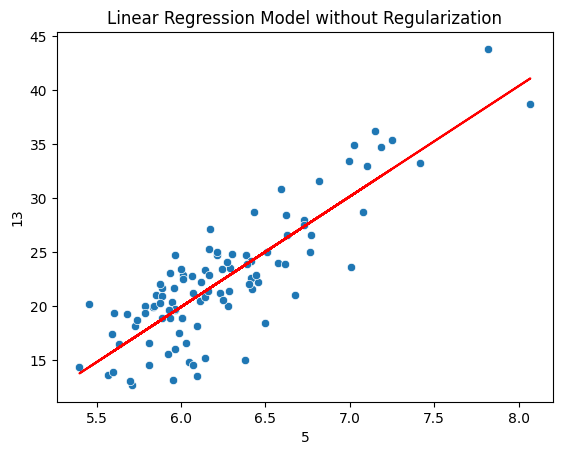

In [11]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Loading data
URL = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv"

# reading data into pandas dataframe
df = pd.read_csv(URL, header=None)

# selecting a single feature 
# only using 100 instances for simplicity
X = df.loc[:100, 5]
y = df.loc[:100, 13] # target label 

X_npy = X.to_numpy()
y_npy = y.to_numpy()

# reshaping the data 
X_reshaped = X_npy[:, np.newaxis]
y_reshaped = y_npy[:, np.newaxis]

# instantiating the linear regression model
linear_regression = LinearRegression()

# training the model 
linear_regression.fit(X_reshaped, y_reshaped)

# making predictions on the training data
y_pred = linear_regression.predict(X_reshaped)

# evaluating the model performance
mse = mean_squared_error(y_reshaped, y_pred)
print(f"Mean Squared Error: {mse}n")

# plotting the line of best fit given by linear regression
sns.scatterplot(x = X, y = y)
plt.plot(X_reshaped, y_pred, color="red")
plt.title("Linear Regression Model without Regularization")
plt.show()

### L1 Regularization

L1 regularization, also known as L1 norm or Lasso (in regression problems), combats overfitting by shrinking the parameters towards 0. This makes some features obsolete. 

It’s a form of feature selection, because when we assign a feature with a 0 weight, we’re multiplying the feature values by 0 which returns 0, eradicating the significance of that feature. If the input features of our model have weights closer to 0, our L1 norm would be sparse. A selection of the input features would have weights equal to zero, and the rest would be non-zero. 

For example, imagine we want to predict housing prices using machine learning. Consider the following features: 

Street – road access,
Neighborhood – property location,
Accessibility – transport access,
Year Built – year the house was built in,
Rooms – number of rooms,
Kitchens – number of kitchens,
Fireplaces – number of fireplaces in the house. 
When predicting the value of a house, intuition tells us that different input features won’t have the same influence on the price. For example, it’s highly likely that the neighborhood or the number of rooms have a higher influence on the price of the property than the number of fireplaces.

So, our L1 regularization technique would assign the fireplaces feature with a zero weight, because it doesn’t have a significant effect on the price. We can expect the neighborhood and the number rooms to be assigned non-zero weights, because these features influence the price of a property significantly. 

Mathematically, we express L1 regularization by extending our loss function like such: 


Essentially, when we use L1 regularization, we are penalizing the absolute value of the weights. 

In real world environments, we often have features that are highly correlated. For example, the year our home was built and the number of rooms in the home may have a high correlation. Something to consider when using L1 regularization is that when we have highly correlated features, the L1 norm would select only 1 of the features from the group of correlated features in an arbitrary nature, which is something that we might not want.

Nonetheless, for our example regression problem, Lasso regression (Linear Regression with L1 regularization) would produce a model that is highly interpretable, and only uses a subset of input features, thus reducing the complexity of the model. 

Example of Lasso Regression in Python:

Mean Squared Error: 34.709124595627884
Model Coefficients: [0.]n


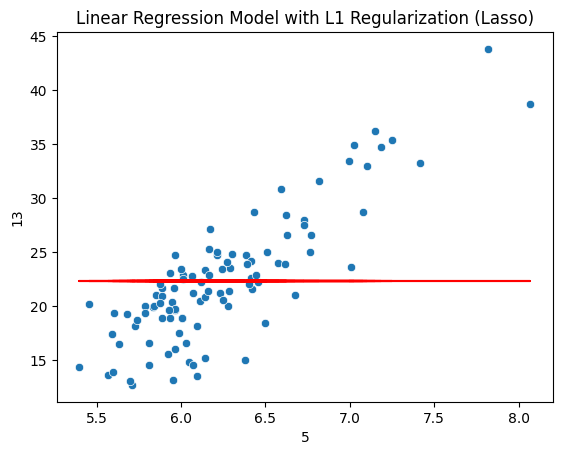

In [12]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error

# Loading data
URL = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv"
df = pd.read_csv(URL, header=None)

# selecting a single feature
# using 100 instances for simplicity
X = df.loc[:100, 5]
y = df.loc[:100, 13] # target label 

X_npy = X.to_numpy()
y_npy = y.to_numpy()

# reshaping the data 
X_reshaped = X_npy[:, np.newaxis]
y_reshaped = y_npy[:, np.newaxis]

# instantiating the lasso regression model
lasso = Lasso(alpha=10)

# training the model
lasso.fit(X_reshaped, y_reshaped)

# making predictions 
y_pred = lasso.predict(X_reshaped)

# evaluating the model
mse = mean_squared_error(y_reshaped, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Model Coefficients: {lasso.coef_}n")

# plotting the line of best fit
sns.scatterplot(x = X, y = y)
plt.plot(X_reshaped, y_pred, color="red")
plt.title("Linear Regression Model with L1 Regularization (Lasso)")
plt.show()

### L2 Regularization

L2 regularization, or the L2 norm, or Ridge (in regression problems), combats overfitting by forcing weights to be small, but not making them exactly 0. 

So, if we’re predicting house prices again, this means the less significant features for predicting the house price would still have some influence over the final prediction, but it would only be a small influence. 

The regularization term that we add to the loss function when performing L2 regularization is the sum of squares of all of the feature weights:


So, L2 regularization returns a non-sparse solution since the weights will be non-zero (although some may be close to 0).

A major snag to consider when using L2 regularization is that it’s not robust to outliers. The squared terms will blow up the differences in the error of the outliers. The regularization would then attempt to fix this by penalizing the weights. 

The differences between L1 and L2 regularization:
- L1 regularization penalizes the sum of absolute values of the weights, whereas L2 regularization penalizes the sum of squares of the weights. 
- The L1 regularization solution is sparse. The L2 regularization solution is non-sparse.
- L2 regularization doesn’t perform feature selection, since weights are only reduced to values near 0 instead of 0. L1 regularization has built-in feature selection.
- L1 regularization is robust to outliers, L2 regularization is not. 

Example of Ridge regression in Python:

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error

# Loading data
URL = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv"
df = pd.read_csv(URL, header=None)

# selecting a single feature and 100 instances for simplicity
X = df.loc[:100, 5]
y = df.loc[:100, 13] # target label 

X_npy = X.to_numpy()
y_npy = y.to_numpy()

# reshaping the data 
X_reshaped = X_npy[:, np.newaxis]
y_reshaped = y_npy[:, np.newaxis]

# instantiation, training and inference
ridge = Ridge(alpha=100)
ridge.fit(X_reshaped, y_reshaped)
y_pred = ridge.predict(X_reshaped)

mse = mean_squared_error(y_reshaped, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Model Coefficients: {ridge.coef_}n")

sns.scatterplot(x = X, y = y)
plt.plot(X_reshaped, y_pred, color="red")
plt.title("Linear Regression Model with L2 Regularization (Ridge)")
plt.show()


### Which is better – L1 or L2 regularization? 

Whether one regularization method is better than the other is a question for academics to debate. However, as a practitioner, there are some important factors to consider when you need to choose between L1 and L2 regularization. I’ve divided them into 6 categories, and will show you which solution is better for each category. 

#### Which solution is more robust? L1 

According to the definition provided by Investopedia, a model is considered robust if its output and forecast are consistently accurate, even if one or more of the input variables or assumptions are drastically changed due to unforeseen circumstances. [Source: Investopedia]

L1 regularization is more robust than L2 regularization for a fairly obvious reason. L2 regularization takes the square of the weights, so the cost of outliers present in the data increases exponentially. L1 regularization takes the absolute values of the weights, so the cost only increases linearly. 

#### What solution has more possibilities? L1 

By this I mean the number of solutions to arrive at one point. L1 regularization uses Manhattan distances to arrive at a single point, so there are many routes that can be taken to arrive at a point. L2 regularization uses Euclidean distances, which will tell you the fastest way to get to a point. This means the L2 norm only has 1 possible solution. 

#### Which solution is less Computationally expensive? L2

Since L2 regularization takes the square of the weights, it’s classed as a closed solution. L1 involves taking the absolute values of the weights, meaning that the solution is a non-differentiable piecewise function or, put simply, it has no closed form solution. L1 regularization is computationally more expensive, because it cannot be solved in terms of matrix math. 

#### Which solution creates a sparse output? L1 

By sparsity, we mean that the solution produced by the regularizer has many values that are zero. However, we know they’re 0, unlike missing data where we don’t know what some or many of the values actually are. 

As previously stated, L2 regularization only shrinks the weights to values close to 0, rather than actually being 0. On the other hand, L1 regularization shrinks the values to 0. This in effect is a form of feature selection, because certain features are taken from the model entirely. With that being said, feature selection could be an additional step before the model you decide to go ahead with is fit, but with L1 regularization you can skip this step, as it’s built into the technique. 